# 读取文件（观察数据集结构）

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 读取波士顿房价数据集
boston = pd.read_csv("boston.csv") 

# 查看数据集的前5行
print(boston.head())
print("******************************************************")#我是分割线
# 查看数据集的基本信息（可用于检测是否有空值/数值类型为多少）
print(boston.info())
print("******************************************************")#我也是分割线
# 查看数据集的统计描述
print(boston.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PIRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
******************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 n

## 数据集说明
波士顿房价数据集包含506个样本，每个样本有14个属性。这些属性包括：
- CRIM：城镇人均犯罪率
- ZN：占地面积超过25,000平方英尺的住宅用地比例
- INDUS：城镇非零售业务地区的比例
- CHAS：查尔斯河虚拟变量（如果临河为1，否则为0）
- NOX：一氧化氮浓度（每千万分之一）
- RM：住宅平均房间数
- AGE：1940年以前建成的自住单位比例
- DIS：到波士顿五个就业中心的加权距离
- RAD：径向公路的可达性指数
- TAX：每10,000美元的全额物业税率
- PTRATIO：城镇师生比例
- B：1000(Bk - 0.63)^2，其中Bk是城镇黑人比例
- LSTAT：人口中地位较低人群的百分比
- MEDV：自住房屋的中位数价值（单位：千美元）

###  绘制各特征与房价的散点图，观察它们之间的关系

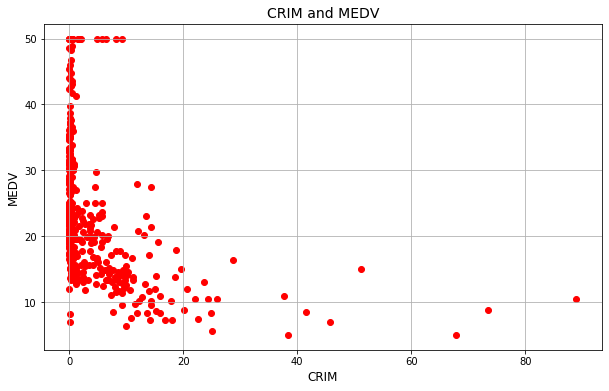

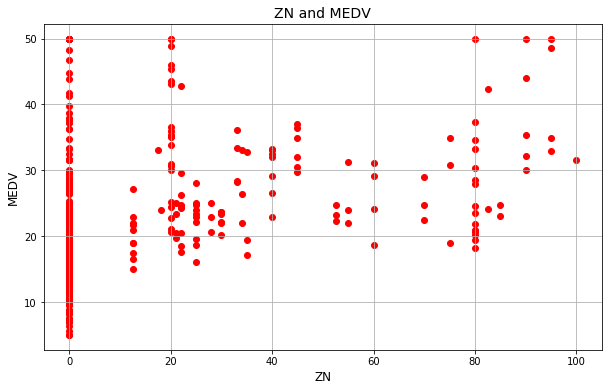

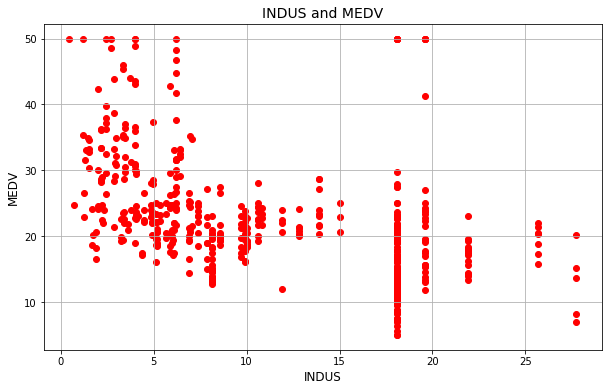

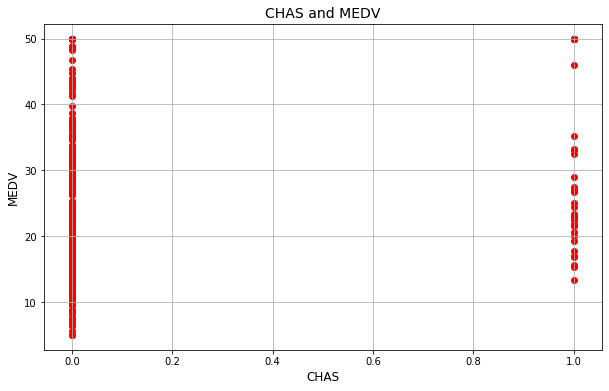

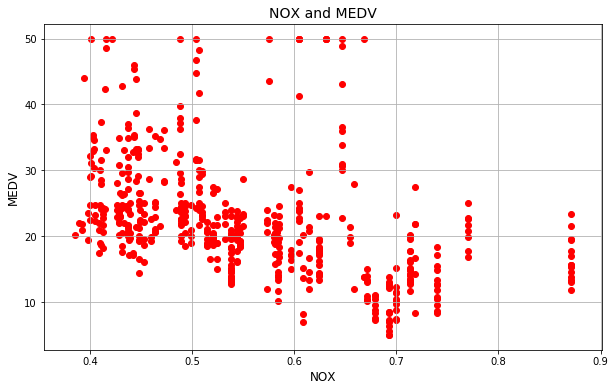

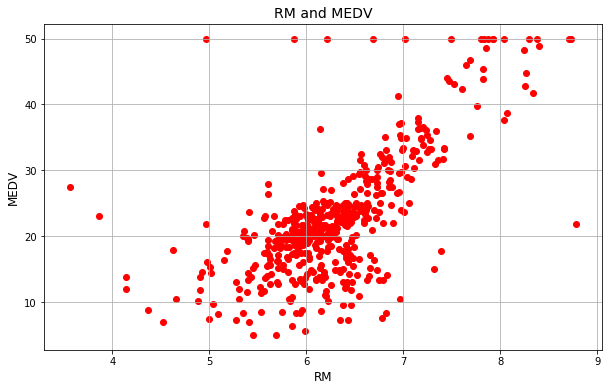

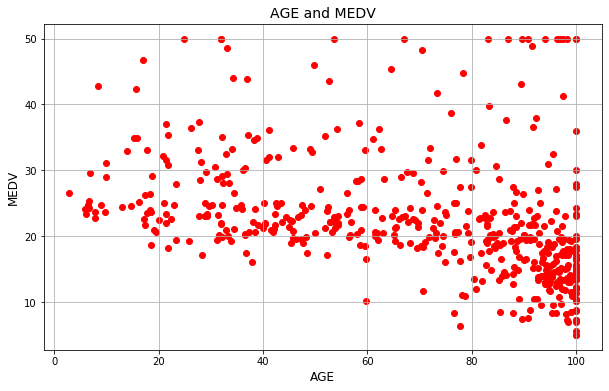

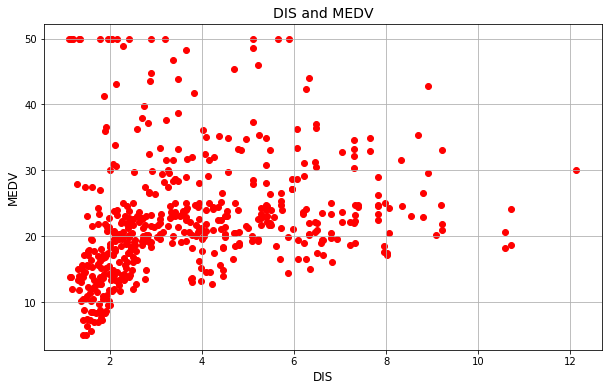

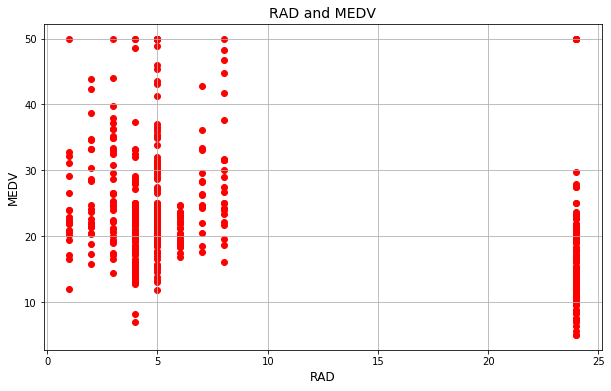

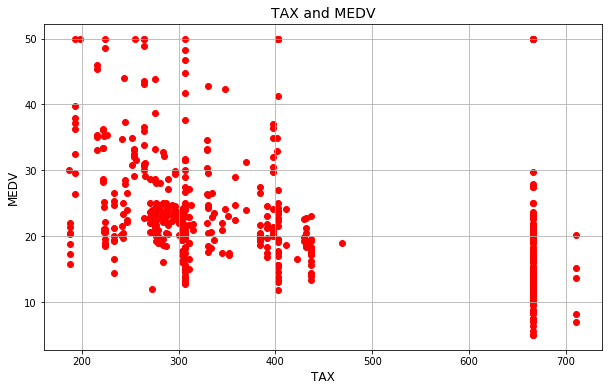

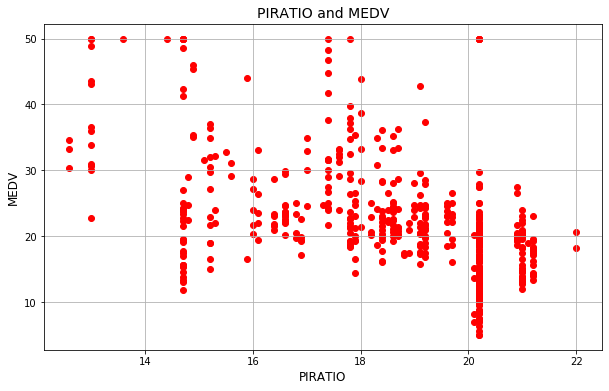

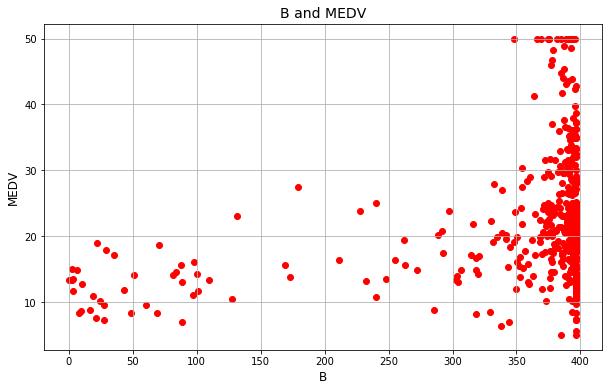

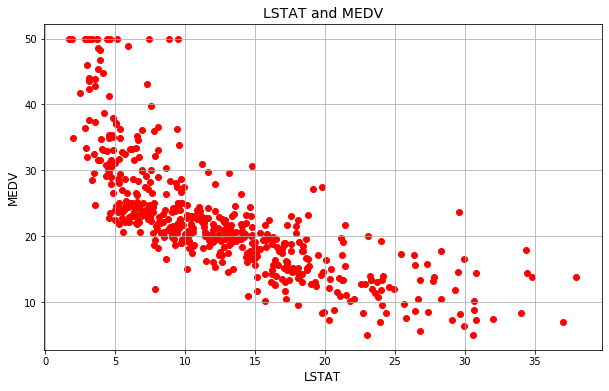

In [5]:
for feature in boston.columns[:-1]:
    # 创建图形和坐标轴
    plt.figure(figsize=(10, 6))
     #我们的图的x采取Boston数据集中自变量的列，y采取MEDV的列，
    plt.scatter(boston[feature], boston['MEDV'], color='red')
    #title是标题的意思
    plt.title(f'{feature} and MEDV', fontsize=14)
    plt.xlabel(f'{feature}', fontsize=12)
    plt.ylabel('MEDV', fontsize=12)
    #添加网格线
    plt.grid(True)
    plt.show()

### 加载数据并划分训练集/测试集

In [6]:
# 将数据集分为自变量和因变量
x=boston.drop('MEDV',axis=1)#删去最后一列（MEDV）的列表，就是我们想要的列表
y=boston['MEDV']

#那我们现在就要开始抽样啦！！！
#但是之前我搞得很麻烦用了一大堆函数才分配完
#但是但是捏，这次我有sample函数
test_size=0.2     #我们测试集的比例
# 随机抽取训练集
x_train = x.sample(frac=1 - test_size, random_state=42)#frac是抽取比例的意思，random_state是随机排列的种子
# 剩余数据作为测试集
x_test = x.drop(x_train.index)
# 对应的目标变量也要进行类似的划分
y_train = y[x_train.index]
y_test = y[x_test.index]

#接下进行特征缩放
x_mean1 = x_train.mean()
x_mean2 = x_test.mean()
x_std1=x_train.std()
x_std2=x_test.std()
x_train=(x_train-x_mean1)/x_std1
x_test=(x_test-x_mean2)/x_std2

# 添加一列全为1的截距项
x_train['intercept'] = 1
x_test['intercept'] = 1

### 实现线性回归的类封装

In [9]:
class LinearRegression:
    #先定义一些最基础的参数（如超参数：学习率，迭代次数，误差结束数）
    def __init__(self,method,learning_rate=0.001,max_iteration=1000,tol=1e-4):
        self.learning_rate=learning_rate
        self.method=method              #决定你想搞梯度下降or最小二乘法
        self.max_iteration=max_iteration
        self.tol=tol
        self.theta=None
        self.loss_history=[]
     
    #那么开始我们的迭代之旅吧（梯度下降/最小二乘法）
    def fit(self,x,y):
        m,n=x.shape
        self.theta=np.zeros(n)   #将多元线性回归的参数归空
        if self.method=='gradient':
            for i in range(self.max_iteration):
                y_pred=x @ self.theta    #预测值
                error=y_pred-y           #差距值
                loss=(error**2).mean()   #Loss数
                self.loss_history.append(loss)
                
                gradient=(x.T @ error)/m  #梯度
                
                self.theta-=self.learning_rate*gradient  #梯度下降
                
                if len(self.loss_history)>1 and abs(self.loss_history[-2]-self.loss_history[-1])<self.tol:
                    break
        elif self.method=='Least square':
            x_t=np.transpose(x)
            self.theta=(np.linalg.inv(x_t@x))@(x_t@y)
        else:
            print("Your message is wrong!!!")
        return self
    #将训练好的模型运用到我们的自变量中
    def predict(self,x):
        return x @ self.theta   
    #用R方来判断他是否拟合这个数据
    def score(self,x,y):      
        y_pred=self.predict(x)         #预测值
        ss_res=((y-y_pred)**2).sum()   #计算残差平方和
        ss_tot=((y-y.mean())**2).sum() #计算总平方和
        return 1-(ss_res/ss_tot)
    
    #用MSE评估公式
    def mse(self,x,y):
        m=len(y)
        y_pred=self.predict(x)
        MSE=((y-y_pred)**2).mean()
        return MSE

### 是时候实现线性回归了！！！

In [10]:
# 创建并训练模型
#梯度下降
model = LinearRegression(method='gradient',learning_rate=0.01, max_iteration=10000)
model.fit(x_train, y_train)
print(f"梯度下降测试集R²分数: {model.score(x_test, y_test):.4f}")
print(f"梯度下降测试集MSE分数: {model.mse(x_test, y_test):.4f}")
print("******************************************************")#我是分割线
#最小二乘法
model2 = LinearRegression(method='Least square',learning_rate=0.01, max_iteration=10000)
model2.fit(x_train, y_train)
print(f"最小二乘法测试集R²分数: {model2.score(x_test, y_test):.4f}")
print(f"最小二乘法测试集MSE分数: {model2.mse(x_test, y_test):.4f}") 

梯度下降测试集R²分数: 0.6695
梯度下降测试集MSE分数: 23.7662
******************************************************
最小二乘法测试集R²分数: 0.6669
最小二乘法测试集MSE分数: 23.9530


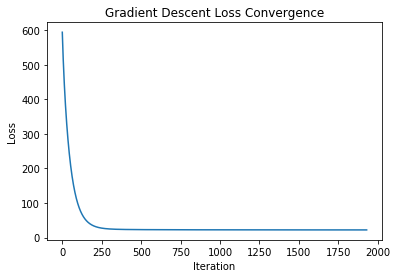

In [9]:
#创建关于使用梯度下降的Loss图像
plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Loss Convergence")
plt.show()

### 尝试一下sklearn的线性回归

In [31]:
#导入sklearn的线性回归库
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 创建模型
lrf = LinearRegression().fit(x_train, y_train)
print(" Linear Regression model:\n", lrf)
y_pred = lrf.predict(x_test)
#评估sklearn的线性回归---R方
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("boston 线性回归模型的 R^2值:", r2_score(y_test, y_pred))
print("boston 线性回归模型均方误差 (MSE):", mean_squared_error(y_test, y_pred))

 Linear Regression model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
boston 线性回归模型的 R^2值: 0.666887035528754
boston 线性回归模型均方误差 (MSE): 23.95295581875957


In [1]:
import inspect
from sklearn.linear_model import LinearRegression

# 获取 LinearRegression 的源代码
source_code = inspect.getsource(LinearRegression)
print(source_code)

class LinearRegression(MultiOutputMixin, RegressorMixin, LinearModel):
    """
    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, optional, default True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, optional, default False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
        an esti